<a href="https://colab.research.google.com/github/Emaan10/Elevvo-ML.internshipTasks/blob/main/Task%202%3A%20Customer%20Segmentation/Elevvo_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Loading Dataset

In [ ]:
file_path = "/Mall_Customers.csv"
df = pd.read_csv(file_path)
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Selecting Relevant Features

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Scaling Features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Scatter Plot of Raw Data

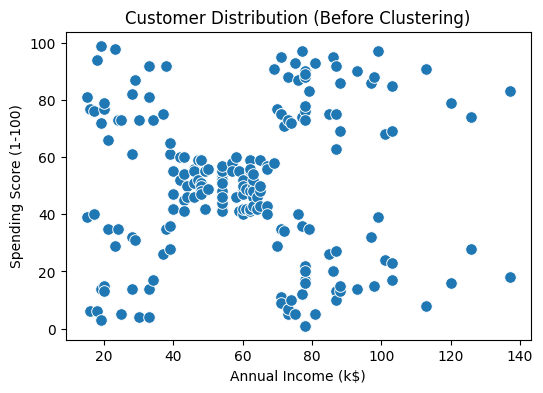

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=70)
plt.title("Customer Distribution (Before Clustering)")
plt.show()

 K-Means (Elbow Method)

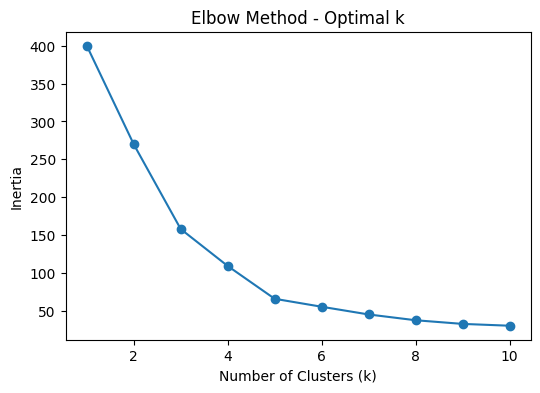

In [ ]:
inertia_list = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

Training Final K-Means Model

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

K-Means Visualization

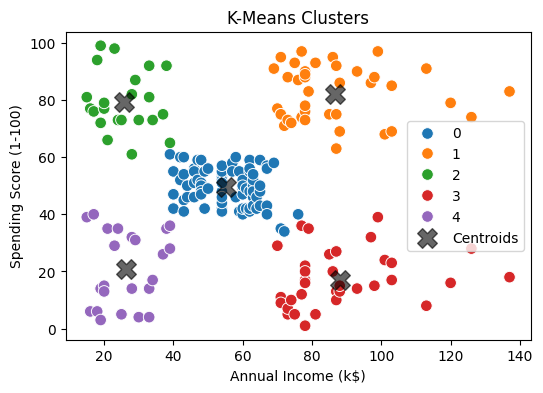

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_KMeans',
    palette='tab10',
    data=df,
    s=70
)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')
plt.title("K-Means Clusters")
plt.legend()
plt.show()

DBSCAN Clustering

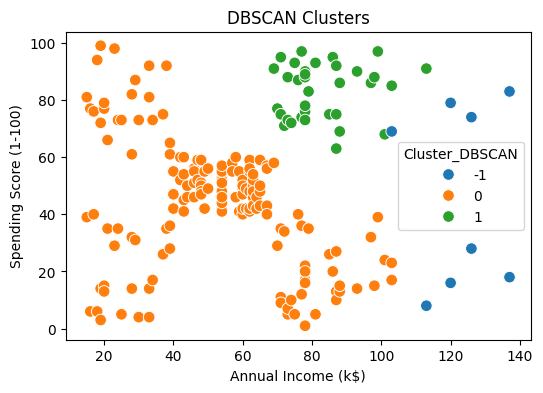


Cluster Summary (DBSCAN, Noise Removed):
                Annual Income (k$)  Spending Score (1-100)  Count
Cluster_DBSCAN                                                   
0                        52.490446               43.101911    157
1                        82.542857               82.800000     35


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster_DBSCAN',
    palette='tab10',
    data=df,
    s=70
)
plt.title("DBSCAN Clusters")
plt.show()

dbscan_summary = df[df['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Cluster_DBSCAN': 'count'
}).rename(columns={'Cluster_DBSCAN': 'Count'})

print("\nCluster Summary (DBSCAN, Noise Removed):")
print(dbscan_summary)

Cluster Analysis and Silhouette Score

In [ ]:
# Cluster Analysis
if 'CustomerID' in df.columns:
    cluster_summary = df.groupby('Cluster_KMeans').agg({
        'Annual Income (k$)': 'mean',
        'Spending Score (1-100)': 'mean',
        'CustomerID': 'count'
    }).rename(columns={'CustomerID': 'Count'})
else:
    cluster_summary = df.groupby('Cluster_KMeans').agg({
        'Annual Income (k$)': 'mean',
        'Spending Score (1-100)': 'mean'
    })

print("\nCluster Summary (K-Means):")
print(cluster_summary)

# Silhouette Score
sil_kmeans = silhouette_score(X_scaled, df['Cluster_KMeans'])
print(f"\nSilhouette Score for K-Means: {sil_kmeans:.3f}")

if len(set(df['Cluster_DBSCAN'])) > 1 and -1 not in set(df['Cluster_DBSCAN']):
    sil_dbscan = silhouette_score(X_scaled, df['Cluster_DBSCAN'])
    print(f"Silhouette Score for DBSCAN: {sil_dbscan:.3f}")
else:
    print("Silhouette Score for DBSCAN: Not calculated (noise or single cluster detected)")


Cluster Summary (K-Means):
                Annual Income (k$)  Spending Score (1-100)  Count
Cluster_KMeans                                                   
0                        55.296296               49.518519     81
1                        86.538462               82.128205     39
2                        25.727273               79.363636     22
3                        88.200000               17.114286     35
4                        26.304348               20.913043     23

Silhouette Score for K-Means: 0.555
Silhouette Score for DBSCAN: Not calculated (noise or single cluster detected)
